# load useful libraries

In [1]:
import scanpy as sc

from warnings import filterwarnings
filterwarnings('ignore')

sc.settings.verbosity = 3
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.23.4 scipy==1.9.3 pandas==1.5.1 scikit-learn==1.1.2 statsmodels==0.13.2 python-igraph==0.10.2 pynndescent==0.5.7


# read data

In [2]:
adata = sc.read_h5ad('./sc_training.h5ad')
adata

AnnData object with n_obs × n_vars = 28697 × 15077
    obs: 'gRNA_maxID', 'state', 'condition', 'lane'
    layers: 'rawcounts'

In [3]:
adata.obs

,gRNA_maxID,state,condition,lane
053l1_AAACCTGAGATGTCGG-1,ONE-NON-GENE-SITE-7,terminal exhausted,Unperturbed,lane1
053l1_AAACCTGAGCAACGGT-1,Tox2-3,effector,Tox2,lane1
053l1_AAACCTGAGTACGACG-1,Tpt1-2,effector,Tpt1,lane1
053l1_AAACCTGAGTCGTTTG-1,Tox2-3,terminal exhausted,Tox2,lane1
053l1_AAACCTGAGTGAAGAG-1,Tcf7-2,effector,Tcf7,lane1
...,...,...,...,...
053l4_TTTGTCATCAGGTTCA-1,Tox2-3,other,Tox2,lane4
053l4_TTTGTCATCAGTGTTG-1,Dvl2-3,cycling,Dvl2,lane4
053l4_TTTGTCATCCTCGCAT-1,Zeb2-2,cycling,Zeb2,lane4
053l4_TTTGTCATCTTCAACT-1,Sox4-3,cycling,Sox4,lane4


# adata.X stores the stadard-normalized data, but you can also reconstruct it using adata.layers['rawcounts']

In [4]:
# make a copy of normalized logcounts
adata.layers['normalized_logcounts'] = adata.X.copy()

In [5]:
# standard normalization
adata.X = adata.layers['rawcounts'].copy()

sc.pp.normalize_total(adata, target_sum=5e3)
sc.pp.log1p(adata)

normalizing counts per cell
    finished (0:00:00)


# visualize cell state clusters on umap

In [6]:
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata, n_neighbors=30, n_pcs=50)
sc.tl.umap(adata, min_dist=0.3) 

computing PCA
    with n_comps=50
    finished (0:00:32)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:20)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:23)


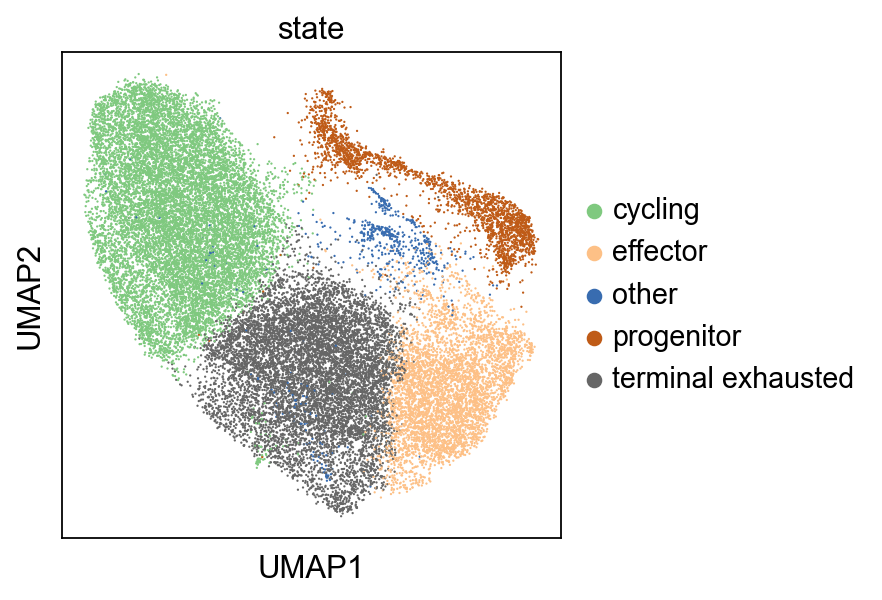

In [7]:
sc.pl.umap(adata, color=['state'], palette='Accent', legend_loc='right margin')